## 1. Introduction to Logistic Regression


Logistic Regression is a classification algorithm used for binary and multi-class classification problems. 
It predicts the probability that a given input belongs to a particular class.

### Why is it called Regression if it's a Classification Algorithm?
The name "Logistic Regression" comes from its foundation in regression techniques. Unlike linear regression, which predicts continuous values, logistic regression applies the sigmoid function to the linear model, converting it into a probability output. Despite being used for classification, it is still called "regression" because it models the relationship between independent variables and the probability of a particular outcome.



## 2. Mathematical Formulation

### Sigmoid Function:
Logistic regression is based on the sigmoid function:

σ(z) = 1 / (1 + e^(-z))

where z = wX + b (linear model)

The probability of a sample belonging to class 1 is given by:
P(Y=1|X) = σ(wX + b)

Decision rule:
- If P(Y=1|X) ≥ 0.5, predict class 1
- If P(Y=1|X) < 0.5, predict class 0

## 3. Logistic Regression in Scikit-Learn


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Generate synthetic dataset
from sklearn.datasets import make_classification

# make_classification generates a synthetic dataset with given parameters
# n_samples: Number of data points
# n_features: Number of input features
# random_state: Ensures reproducibility
data, labels = make_classification(n_samples=1000, n_features=5, random_state=42)

In [3]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Label'] = labels

In [4]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,-0.439643,0.542547,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1


In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
# Standardizing the data
"""
Standardization is essential for logistic regression because it ensures that all features contribute equally to the model. 
Since features may have different scales, standardization transforms them to have a mean of 0 and a standard deviation of 1. 
This helps in faster convergence and prevents dominance of features with larger scales over smaller ones.
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Creating and training logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluating the model

print("Accuracy:", accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



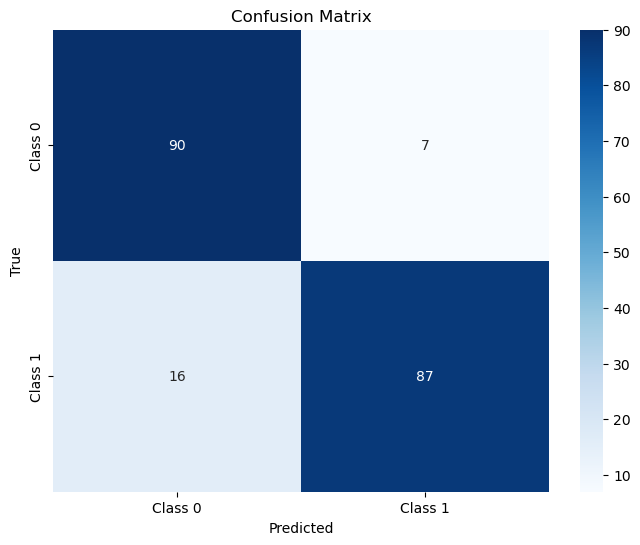

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 4. Understanding the Formula Used by Scikit-Learn

Scikit-learn uses the logistic function:

P(Y=1|X) = 1 / (1 + exp(-(wX + b)))

To find the optimal parameters (w, b), sklearn minimizes the log-loss function:

Loss = - (1/n) * Σ [ y*log(p) + (1-y)*log(1-p) ]

where p = P(Y=1|X).

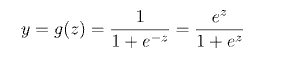

This variable is either 1 or 0 (y belongs to {0,1}).

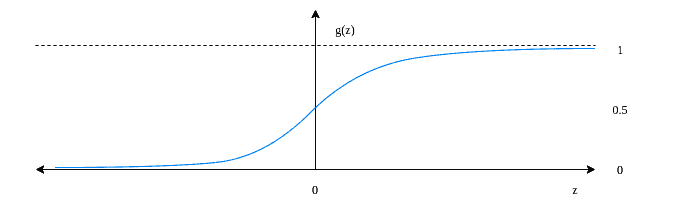

We choose the hypothesis function to be the sigmoid function:

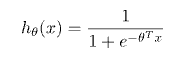


Here, theta denotes the parameter vector. For a model containing n features, we have theta = [theta_0, theta_1, ..., theta_n] containing n + 1 parameters. The hypothesis function approximates the estimated probability of the actual output being equal to 1. In other words:

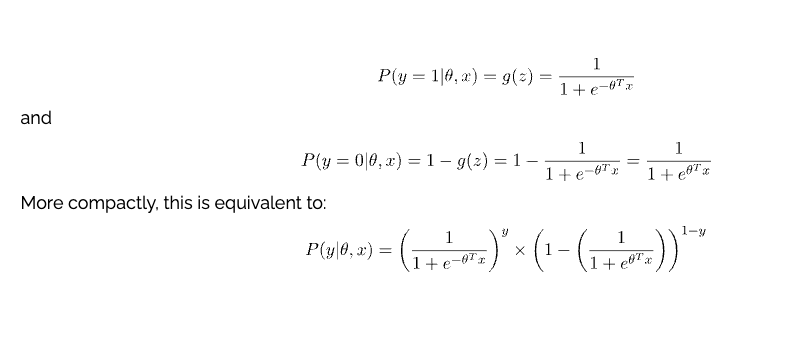

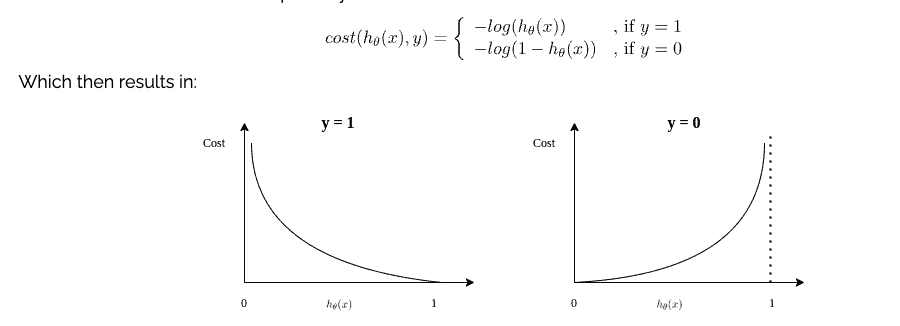

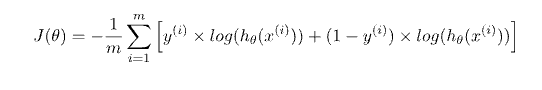

This way, we can find an optimal solution minimizing the cost over model parameters: minimize J(0)

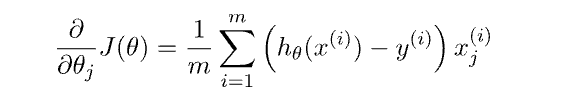

## 5. Hyperparameters of Logistic Regression

- `penalty`: Type of regularization ("l1", "l2", "elasticnet", or "none")
- `C`: Inverse of regularization strength (smaller values = stronger regularization)
- `solver`: Optimization algorithm ("lbfgs", "liblinear", "saga", etc.)
- `max_iter`: Maximum number of iterations for convergence


## 6. Advanced Logistic Regression: Regularization and Feature Importance


In [24]:
# Regularized logistic regression
model_reg = LogisticRegression(penalty='l2', C=0.4, solver='lbfgs')
model_reg.fit(X_train, y_train)
print("Accuracy with Regularization:", accuracy_score(y_test, model_reg.predict(X_test)))

Accuracy with Regularization: 0.885


## 7. Prediction on Test Data

In [27]:
# Making predictions on the test dataset
test_predictions = model.predict(X_test)
print("Predictions on Test Data:", test_predictions[:10])  # Display first 10 predictions

Predictions on Test Data: [1 0 1 1 0 0 1 0 0 1]


## 8. Inference for Example Features

In [28]:
# Example feature input for inference
example_features = np.array([[0.5, -1.2, 2.3, 0.8, -0.5]])

example_features_scaled = scaler.transform(example_features)  # Apply standardization

In [29]:
# Making prediction
inference_prediction = model.predict(example_features_scaled)
print("Inference Prediction:", inference_prediction)

Inference Prediction: [1]


## 9. Classification Using a Real Dataset


In [12]:
import pandas as pd

df = pd.read_csv('diabetes_dataset.csv')

In [13]:
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [15]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [18]:
df.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [19]:
df.duplicated().sum()


0

In [20]:
df.describe()


,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [22]:
# Splitting the dataset
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Training logistic regression model
# model = LogisticRegression()
model = LogisticRegression(penalty='l1', C=0.6, solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Diabetes Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Diabetes Dataset Accuracy: 0.9931865828092243
Confusion Matrix:
 [[1274    1]
 [  12  621]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1275
           1       1.00      0.98      0.99       633

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908



In [ ]:
import joblib

joblib.dump(model, "logistic_regression_model.joblib")
joblib.dump(scaler, "diabees_scaler.joblib")

In [ ]:
import numpy as np
patient_sample = np.array([[69, 5, 28.39, 130.1, 77.0, 5.4, 130.4, 44.0, 50.0, 90.5, 107.9, 0.84, 0, 0, 0, 1]])

loaded_model = joblib.load("logistic_regression_model.joblib")
loaded_scaler = joblib.load("diabees_scaler.joblib")

In [ ]:
patient_sample_scaled = loaded_scaler.transform(patient_sample)

# patient_sample_scaled after transformation is actual input for model
predictions = loaded_model.predict(patient_sample_scaled)

In [4]:
label_map = {0: "There is no chance of having diabetes", 1: "There is chance of having diabetes"}

In [6]:
prediction = label_map[predictionds[0]]

In [7]:
prediction

'There is chance of having diabetes'

In [ ]:
# user should able to say, I have this this this like I'm 24 years old, My bmi is 25.6, ..... UI ma input
# predict button
# prediction should be shown
# streamlit --> push to github send in the group